# 02 - Exploratory Data Analysis (EDA)

**Objective**: Explore the cleaned dataset to understand patterns, relationships, and insights about flight delays.

**Analysis includes**:
- Target variable distribution
- Delay patterns by airline, month, day of week
- Distance and delay relationships
- Cancellation and delay correlations
- Visualizations for key insights

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set()


In [2]:
# Load cleaned data
data_path = 'data/flight_data_2018_2024_cleaned.csv'
df = pd.read_csv(data_path, low_memory=False)
df.columns = df.columns.str.strip()

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {len(df.columns)}")
df.head()

Dataset shape: (582425, 46)

Columns: 46


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,Flights,Distance,DistanceGroup,DivAirportLandings,Duplicate,DELAYED
0,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,4432,G7,20500,G7,4432,13296,1329605,30721,MHT,"Manchester, NH",NH,33,New Hampshire,14,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1738,1700-1759,1922,1900-1959,0.0,0.0,104.0,1.0,209.0,1,0,N,1
1,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,4430,G7,20500,G7,4430,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,815,0800-0859,934,0900-0959,0.0,0.0,79.0,1.0,212.0,1,0,N,0
2,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,4429,G7,20500,G7,4429,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,13296,1329605,30721,MHT,"Manchester, NH",NH,33,New Hampshire,14,1540,1500-1559,1656,1600-1659,0.0,0.0,76.0,1.0,209.0,1,0,N,1
3,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,4428,G7,20500,G7,4428,15016,1501606,31123,STL,"St. Louis, MO",MO,29,Missouri,64,13930,1393008,30977,ORD,"Chicago, IL",IL,17,Illinois,41,630,0600-0659,758,0700-0759,0.0,0.0,88.0,1.0,258.0,2,0,N,0
4,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,4427,G7,20500,G7,4427,15016,1501606,31123,STL,"St. Louis, MO",MO,29,Missouri,64,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,1300,1300-1359,1603,1600-1659,0.0,0.0,123.0,1.0,696.0,3,0,N,1


Target Distribution:
DELAYED
0    61.677813
1    38.322187
Name: proportion, dtype: float64

Total flights: 582,425
Delayed flights: 223,198 (38.32%)
On-time flights: 359,227 (61.68%)


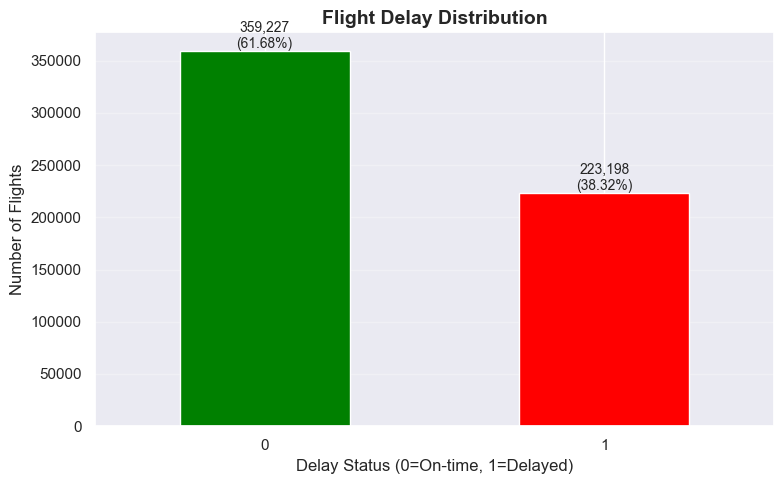

In [3]:
# Target variable distribution
target_dist = df['DELAYED'].value_counts(normalize=True) * 100
print("Target Distribution:")
print(target_dist)
print(f"\nTotal flights: {len(df):,}")
print(f"Delayed flights: {df['DELAYED'].sum():,} ({target_dist[1]:.2f}%)")
print(f"On-time flights: {(df['DELAYED']==0).sum():,} ({target_dist[0]:.2f}%)")

# Visualization
plt.figure(figsize=(8, 5))
df['DELAYED'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Flight Delay Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Delay Status (0=On-time, 1=Delayed)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(df['DELAYED'].value_counts()):
    plt.text(i, v, f'{v:,}\n({target_dist[i]:.2f}%)', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [4]:
df.columns


Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'Flights', 'Distance', 'DistanceGroup', 'DivAirportLandings',
       'Duplicate', 'DELAYED'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip()

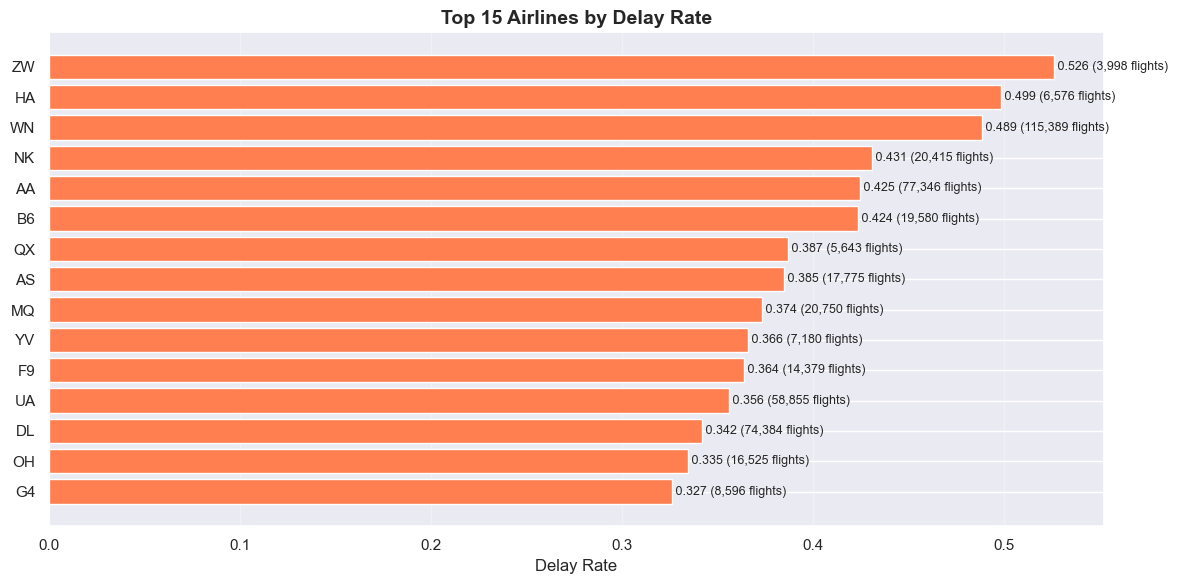

In [6]:
# Delay rate by airline
airline_delays = df.groupby('Operating_Airline')['DELAYED'].agg(['mean', 'count']).sort_values('mean', ascending=False)
airline_delays.columns = ['Delay_Rate', 'Flight_Count']
top_airlines = airline_delays.head(15)

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(top_airlines)), top_airlines['Delay_Rate'], color='coral')
plt.yticks(range(len(top_airlines)), top_airlines.index)
plt.xlabel('Delay Rate', fontsize=12)
plt.title('Top 15 Airlines by Delay Rate', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top_airlines.iterrows()):
    plt.text(row['Delay_Rate'], i, f" {row['Delay_Rate']:.3f} ({int(row['Flight_Count']):,} flights)", 
             va='center', fontsize=9)
plt.tight_layout()
plt.show()


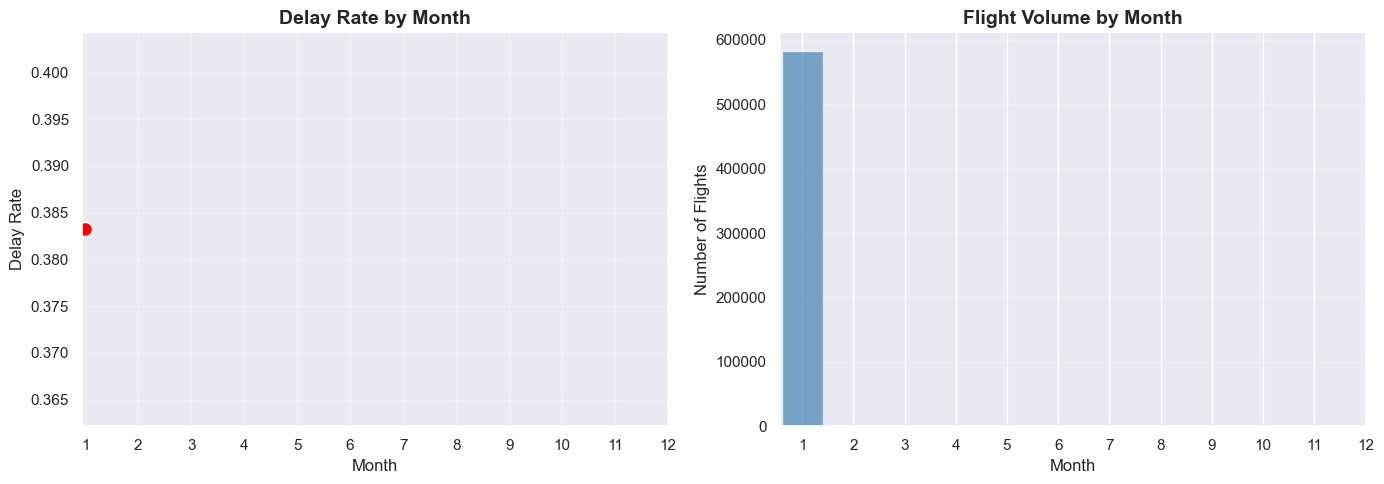

In [7]:
# Delay patterns by month
monthly_delays = df.groupby('Month')['DELAYED'].agg(['mean', 'count'])
monthly_delays.columns = ['Delay_Rate', 'Flight_Count']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Delay rate by month
ax1.plot(monthly_delays.index, monthly_delays['Delay_Rate'], marker='o', linewidth=2, markersize=8, color='red')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Delay Rate', fontsize=12)
ax1.set_title('Delay Rate by Month', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.set_xticks(range(1, 13))

# Flight count by month
ax2.bar(monthly_delays.index, monthly_delays['Flight_Count'], color='steelblue', alpha=0.7)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Number of Flights', fontsize=12)
ax2.set_title('Flight Volume by Month', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticks(range(1, 13))

plt.tight_layout()
plt.show()


In [8]:
# Delay patterns by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_delays = df.groupby('DayOfWeek')['DELAYED'].agg(['mean', 'count'])
day_delays.index = [day_names[i-1] if i <= 7 else f'Day {i}' for i in day_delays.index]

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(day_delays)), day_delays['Delay_Rate'], color='teal', alpha=0.7)
plt.xticks(range(len(day_delays)), day_delays.index, rotation=45, ha='right')
plt.ylabel('Delay Rate', fontsize=12)
plt.title('Delay Rate by Day of Week', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(day_delays.iterrows()):
    plt.text(i, row['Delay_Rate'], f"{row['Delay_Rate']:.3f}", 
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


KeyError: 'Delay_Rate'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Distance vs Delay analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(x='DELAYED', y='Distance', data=df, ax=ax1, palette=['green', 'red'])
ax1.set_xticklabels(['On-time', 'Delayed'])
ax1.set_xlabel('Delay Status', fontsize=12)
ax1.set_ylabel('Distance (miles)', fontsize=12)
ax1.set_title('Distance Distribution by Delay Status', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Distance groups delay rate
if 'DistanceGroup' in df.columns:
    dist_delays = df.groupby('DistanceGroup')['DELAYED'].mean().sort_index()
    ax2.bar(range(len(dist_delays)), dist_delays.values, color='purple', alpha=0.7)
    ax2.set_xticks(range(len(dist_delays)))
    ax2.set_xticklabels(dist_delays.index, rotation=45, ha='right')
    ax2.set_ylabel('Delay Rate', fontsize=12)
    ax2.set_title('Delay Rate by Distance Group', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(dist_delays.values):
        ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


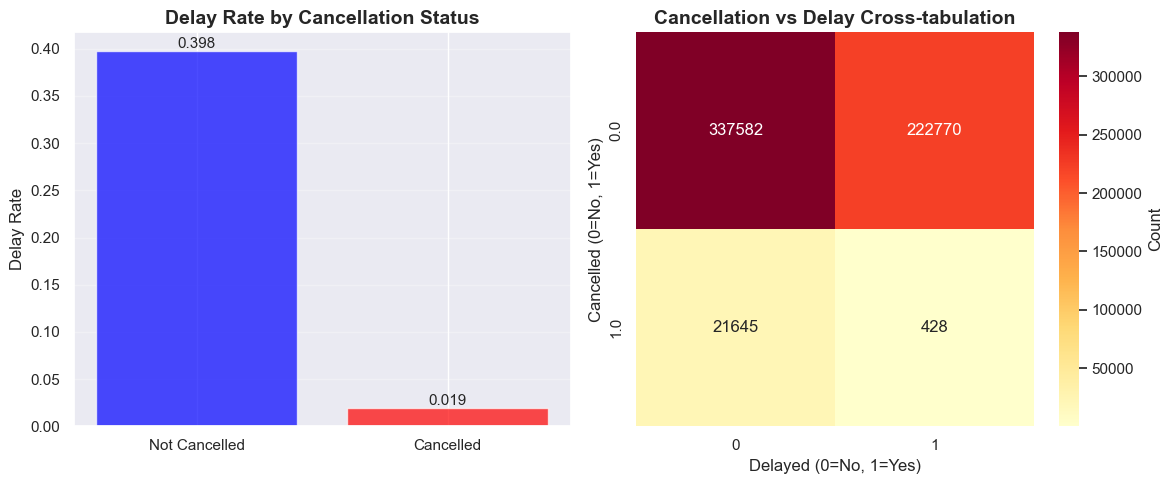


KEY INSIGHTS SUMMARY
Overall delay rate: 38.32%
Total flights analyzed: 582,425
Cancellation rate: 3.79%
Average distance: 809.3 miles
Most delayed month: 1 (38.32%)
Most delayed day: 7 (41.32%)


In [9]:
# Cancellation and Delay relationship
if 'Cancelled' in df.columns:
    cancel_delay = pd.crosstab(df['Cancelled'], df['DELAYED'], normalize='index') * 100
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Delay rate by cancellation status
    cancel_delay_rate = df.groupby('Cancelled')['DELAYED'].mean()
    ax1.bar(['Not Cancelled', 'Cancelled'], cancel_delay_rate.values, color=['blue', 'red'], alpha=0.7)
    ax1.set_ylabel('Delay Rate', fontsize=12)
    ax1.set_title('Delay Rate by Cancellation Status', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    for i, v in enumerate(cancel_delay_rate.values):
        ax1.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=11)
    
    # Correlation heatmap
    cancel_delay_pct = pd.crosstab(df['Cancelled'], df['DELAYED'])
    sns.heatmap(cancel_delay_pct, annot=True, fmt='d', cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Count'})
    ax2.set_xlabel('Delayed (0=No, 1=Yes)', fontsize=12)
    ax2.set_ylabel('Cancelled (0=No, 1=Yes)', fontsize=12)
    ax2.set_title('Cancellation vs Delay Cross-tabulation', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Summary statistics
print("\n" + "="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)
print(f"Overall delay rate: {df['DELAYED'].mean():.2%}")
print(f"Total flights analyzed: {len(df):,}")
if 'Cancelled' in df.columns:
    print(f"Cancellation rate: {df['Cancelled'].mean():.2%}")
print(f"Average distance: {df['Distance'].mean():.1f} miles")
print(f"Most delayed month: {df.groupby('Month')['DELAYED'].mean().idxmax()} ({df.groupby('Month')['DELAYED'].mean().max():.2%})")
print(f"Most delayed day: {df.groupby('DayOfWeek')['DELAYED'].mean().idxmax()} ({df.groupby('DayOfWeek')['DELAYED'].mean().max():.2%})")
print("="*60)
